In [1]:
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
#首先将数据导入
train = pd.read_csv('beijing_house_train.csv', encoding = 'iso-8859-1')
test = pd.read_csv('beijing_house_test.csv', encoding = 'iso-8859-1')
#test1 = pd.read_csv('E:\\学习资料\\大三上\机器学习\\实验\\house_test.csv', encoding = 'iso-8859-1') 
pre_test = test

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head(5)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,1.01e+11,116.475489,40.019520,1.110000e+12,2016/8/9,1464.0,106,415.0,31680,...,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,1.01e+11,116.453917,39.881534,1.110000e+12,2016/7/28,903.0,126,575.0,43436,...,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,1.01e+11,116.561978,39.877145,1.110000e+12,2016/12/11,1271.0,48,1030.0,52021,...,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,1.01e+11,116.438010,40.076114,1.110000e+12,2016/9/30,965.0,138,297.5,22202,...,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101087277815....,1.01e+11,116.466280,39.991363,1.110000e+12,2016/7/22,861.0,57,275.6,52000,...,4.0,2005.0,3,6,0.333,1.0,1.0,0.0,7,67738.0


In [4]:
print('The data size is : {} '.format(train.shape))

The data size is : (255081, 26) 


可以看到共有255k的样本，每个样本26个特征值

In [5]:
train.columns.values

array(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio',
       'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'], dtype=object)

#url网址 #id交易编号 #Lng经度 #Lat纬度 #Cid小区编号

#tradeTime成交时间 #DOM上架时间-从委托出售到成交的时间 #followers关注度 #totalPrice成交总价 #price成交单价 #square面积

#livingRoom卧室数量 #drawingRoom客厅数量 #kitchen厨房数量 #bathRoom卫生间数 #floor所在楼层

#buildingType建筑类型，包括塔楼，平房，板塔结合，板楼 #constructionTime建造时间 #renovationCondition装修情况，包括其他，毛坯，简装，精装

#buildingStructure建筑结构类型，包括不确定，混合，砖木，砖混，钢 #ladderRatio户梯比例，电梯数量除以住户数量 #elevator有无电梯

#fiveYearsProperty是否满五年 #subway是否地铁沿线 #district所在行政区 #communityAverage本小区均价

In [6]:
train.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                    float64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom             float64
drawingRoom              int64
kitchen                  int64
bathRoom               float64
floor                  float64
buildingType           float64
constructionTime       float64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

观察数据类型，tradeTime是object，期望是int；livingRoom是object，期望是int

In [7]:
train.isnull().sum().sort_values(ascending=False)

DOM                    126313
constructionTime        15522
buildingType             1636
communityAverage          378
elevator                   20
fiveYearsProperty          20
floor                      20
livingRoom                 20
subway                     20
bathRoom                    2
id                          0
Lng                         0
Lat                         0
totalPrice                  0
Cid                         0
tradeTime                   0
followers                   0
drawingRoom                 0
price                       0
square                      0
district                    0
kitchen                     0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
url                         0
dtype: int64

查看数据缺失情况，有DOM、constructionTime、buildingType、communityAverage、subway、fiveYearsProperty、elevator、bathRoom 
大量缺失的DOM用均值填充，
constructionTime存在一定量的缺失，尝试用tradeTime减去DOM进行估算；
subway 、fiveYearsProperty、elevator、bathRoom没有给出的一律当做没有；
buildingType用众数填充；

In [8]:
train['DOM'].fillna(train['DOM'].dropna().mean(0), inplace=True)
test['DOM'].fillna(test['DOM'].dropna().mean(0), inplace=True)
#train['DOM'] = train['DOM'].astype('int64')

均值填充DOM

In [9]:
train['tradeyear'] = train['tradeTime'].astype('datetime64[ns]').astype(str).str[0:4].astype('int64')
train['trademon'] = train['tradeTime'].astype('datetime64[ns]').astype(str).str[5:7].astype('int64')
train['tradeday'] = train['tradeTime'].astype('datetime64[ns]').astype(str).str[8:].astype('int64')

test['tradeyear'] = test['tradeTime'].astype('datetime64[ns]').astype(str).str[0:4].astype('int64')
test['trademon'] = test['tradeTime'].astype('datetime64[ns]').astype(str).str[5:7].astype('int64')
test['tradeday'] = test['tradeTime'].astype('datetime64[ns]').astype(str).str[8:].astype('int64')

train = train.drop('tradeTime', axis = 1)
test = test.drop('tradeTime', axis = 1)

读进来的trade是2016/8/9这种格式，先转化成datetime的格式，即为2016-08-09，再当成字符串把年月日分别提取出来转化成int类型

In [10]:
train['constructionTime'] = train['constructionTime'].fillna(train['tradeyear'] - train['DOM']/365)
train['constructionTime'] = train['constructionTime'].astype('int64')

test['constructionTime'] = test['constructionTime'].fillna(test['tradeyear'] - test['DOM']/365)
test['constructionTime'] = test['constructionTime'].astype('int64')

用出售年份减去售卖时间当做建造的时间

In [11]:
train['bathRoom'] = train['bathRoom'].fillna(0)
train['subway'] = train['subway'].fillna(0) 
train['fiveYearsProperty'] = train['fiveYearsProperty'].fillna(0) 
train['elevator'] = train['elevator'].fillna(0) 
train['livingRoom'] = train['livingRoom'].fillna(0)
train['drawingRoom'] = train['drawingRoom'].fillna(0)

test['bathRoom'] = test['bathRoom'].fillna(0)
test['subway'] = test['subway'].fillna(0) 
test['fiveYearsProperty'] = test['fiveYearsProperty'].fillna(0) 
test['elevator'] = test['elevator'].fillna(0) 
test['livingRoom'] = test['livingRoom'].fillna(0)
test['drawingRoom'] = test['drawingRoom'].fillna(0)

In [12]:
train['buildingType'] = train['buildingType'].fillna(train['buildingType'].mode().iloc[0])
train['communityAverage'] = train['communityAverage'].fillna(train['communityAverage'].median())
train['floor'] = train['floor'].fillna(train['floor'].median())


test['buildingType'] = test['buildingType'].fillna(test['buildingType'].mode().iloc[0])
test['communityAverage'] = test['communityAverage'].fillna(test['communityAverage'].median())
test['floor'] = test['floor'].fillna(test['floor'].median())

In [13]:
train.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                    float64
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom             float64
drawingRoom              int64
kitchen                  int64
bathRoom               float64
floor                  float64
buildingType           float64
constructionTime         int64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
tradeyear                int64
trademon                 int64
tradeday                 int64
dtype: object

In [14]:
train.isnull().sum().sort_values(ascending=False)

tradeday               0
trademon               0
id                     0
Lng                    0
Lat                    0
Cid                    0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
tradeyear              0
url                    0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


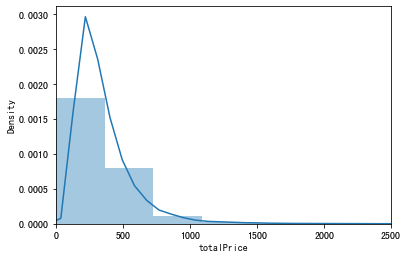

In [15]:
plt.xlim([-0.5, 2500])
sns.distplot(train['totalPrice'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


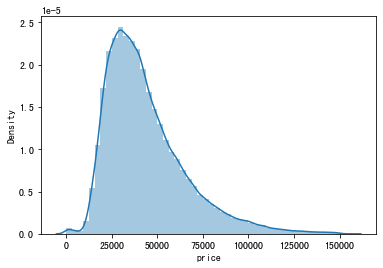

In [16]:
sns.distplot(train['price'])

观察价格的分布，可以看到单价0-150000不等，最多的是30000+，总价基本在0-500w间

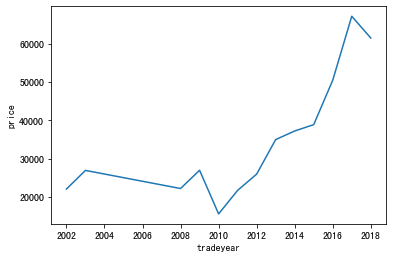

In [17]:
price_by_year = train.groupby('tradeyear').price.mean()
sns.lineplot(data = price_by_year)

将每年出售的房子价格列出可以看到2010是房价低谷，10年之前还保持均衡的状态，10年后房价就开始呈直线上升

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


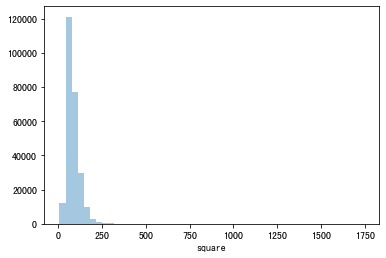

In [18]:
sns.distplot(a = train['square'],kde=False)

观察房子的面积分布，大部分集中在100-200左右，小面积和大面积的比较少

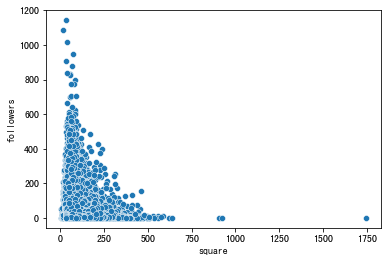

In [19]:
sns.scatterplot(x = train['square'], y = train['followers'])

我觉的关注度是最能体现需求的一大特征值，可以看到对于100平左右面积的房子需求量是最大的，也间接说明了大部分人还处于正常生活的房子需求内

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


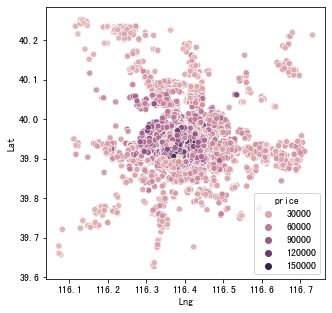

In [20]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = train['Lng'], y = train['Lat'], hue = train['price'])

根据经纬度可以还原北京房子的地图，可以看到市中心房价很高，并从天安门向外发散，价格也渐减

bins = [-1, 10000, 50000, 100000, 999999]
labels = [0, 1, 2, 3]
train['price_band'] = pd.cut(train['price'], bins, right=False, labels=labels)

将价格分区，0,1,2,3分别是低，普，高，豪

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


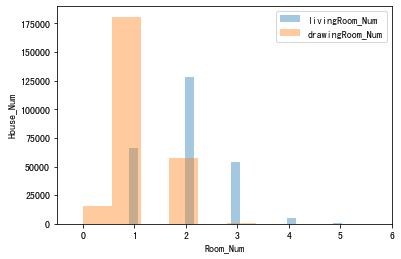

In [21]:
sns.distplot(a = train['livingRoom'], kde=False, label='livingRoom_Num')
sns.distplot(a = train['drawingRoom'], kde=False, label='drawingRoom_Num')
#sns.distplot(a = train['bathRoom'], kde=False, label='bathRoom_Num')
plt.xlim(-0.5, 6)
plt.xlabel('Room_Num')
plt.ylabel('House_Num')
plt.legend()

观察客厅和卧室的情况，大部分房子都是两室一厅，符合正常家庭需求，客厅一般不会有例外，卧室有可能存在或多或少的情况

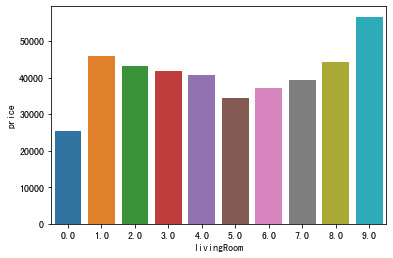

In [22]:
livingRoom_Num = train.groupby('livingRoom').price.mean()
sns.barplot(x = livingRoom_Num.index, y = livingRoom_Num)

观察不同卧室数对价格的影响，发现1-3个卧室的价格一般高于其他

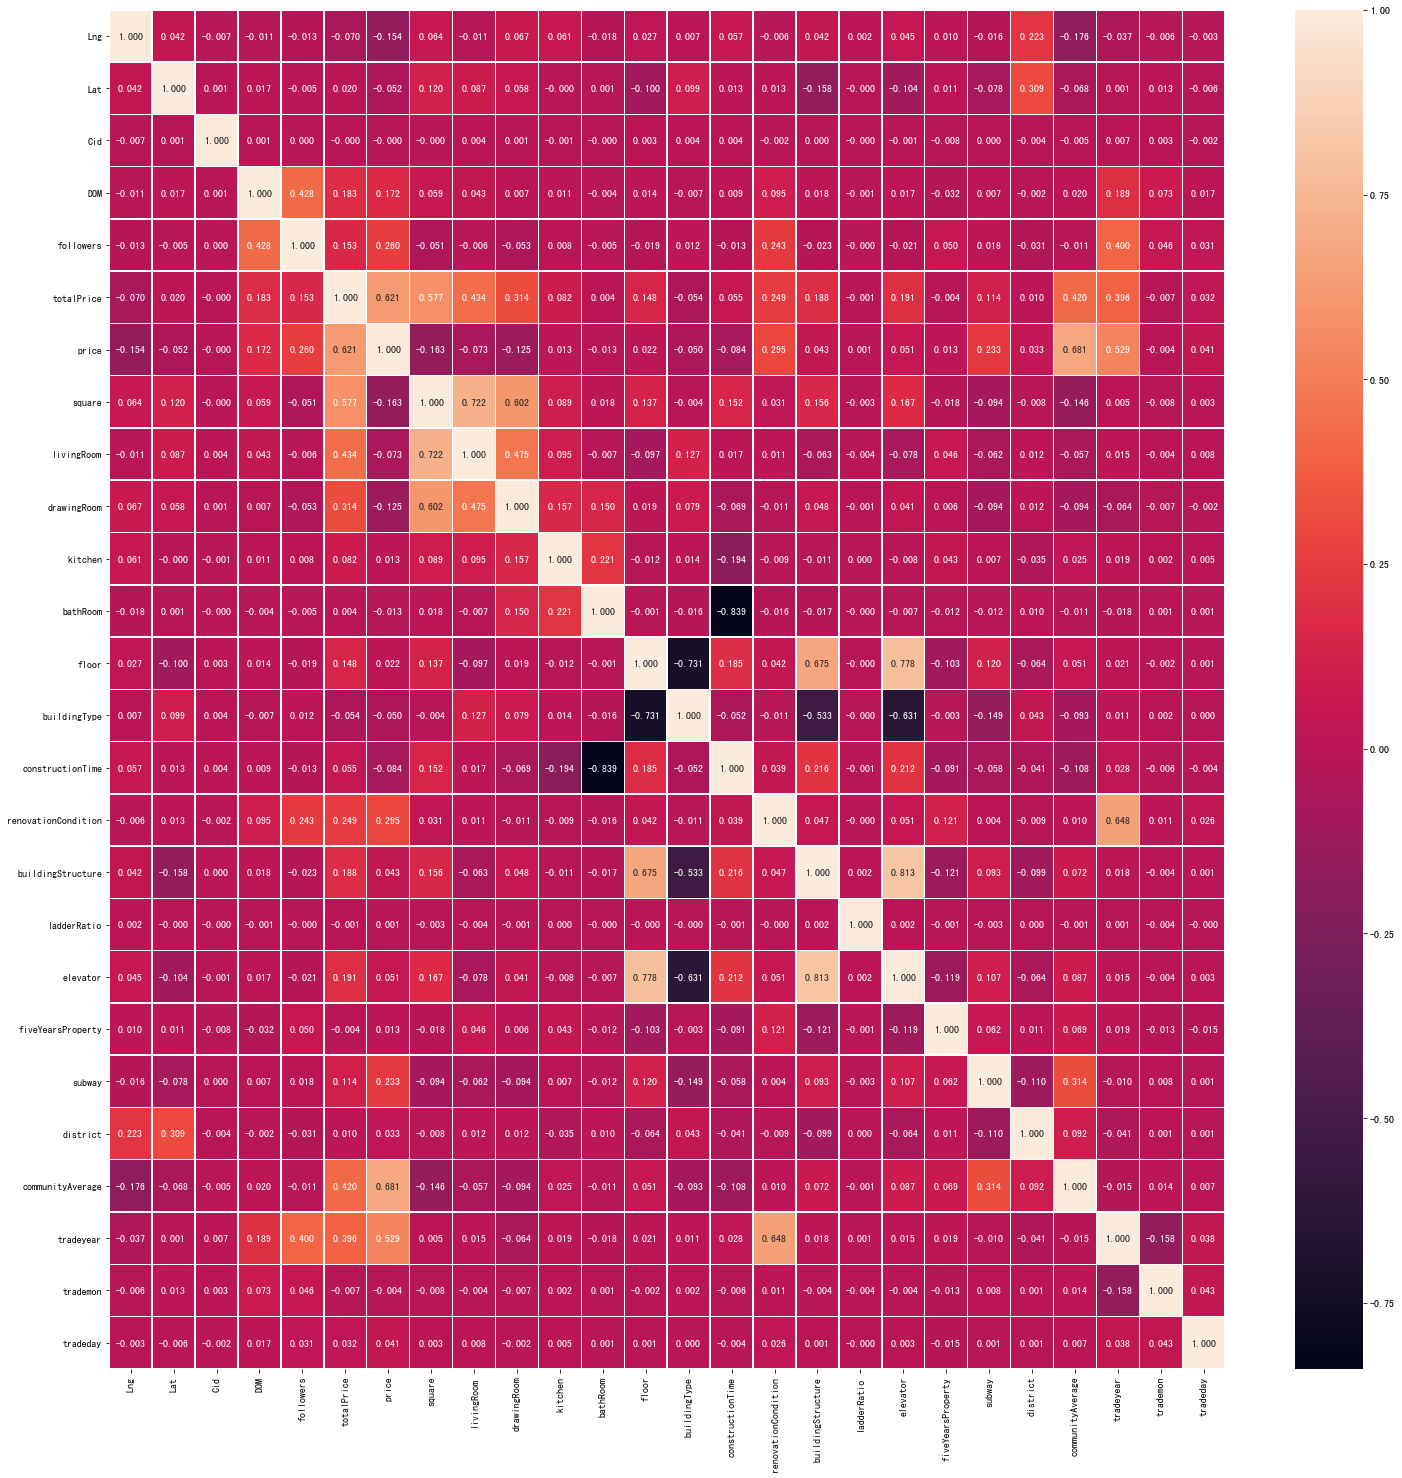

In [23]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.show()

查看所有特征值的相关性，可以看到与price可能有关系的有followers、renovationCondition 、subway 、communityAverage、tradeyear

In [24]:
train = train.drop(['url', 'id', 'Cid', 'Lng', 'Lat', 'kitchen', 'bathRoom', 
                    'buildingType', 'constructionTime', 'ladderRatio', 
                    'fiveYearsProperty', 'district', 'trademon', 'tradeday'], axis=1)
test = test.drop(['url', 'id', 'Cid', 'Lng', 'Lat', 'kitchen', 'bathRoom', 
                    'buildingType', 'constructionTime', 'ladderRatio', 
                    'fiveYearsProperty', 'district', 'trademon', 'tradeday'], axis=1)

认为corr值低的与totalPrice无关，予以删除

In [25]:
train.head(5)

,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,floor,renovationCondition,buildingStructure,elevator,subway,communityAverage,tradeyear
0,1464.0,106,415.0,31680,131.00,2.0,1,26.0,3,6,1.0,1.0,56021.0,2016
1,903.0,126,575.0,43436,132.38,2.0,2,22.0,4,6,1.0,0.0,71539.0,2016
2,1271.0,48,1030.0,52021,198.00,3.0,2,4.0,3,6,1.0,0.0,48160.0,2016
3,965.0,138,297.5,22202,134.00,3.0,1,21.0,1,6,1.0,0.0,51238.0,2016
4,861.0,57,275.6,52000,53.00,1.0,0,8.0,3,6,1.0,0.0,67738.0,2016


In [26]:
train.isnull().sum().sort_values(ascending=False)

tradeyear              0
communityAverage       0
subway                 0
elevator               0
buildingStructure      0
renovationCondition    0
floor                  0
drawingRoom            0
livingRoom             0
square                 0
price                  0
totalPrice             0
followers              0
DOM                    0
dtype: int64

In [27]:
#建立模型用的训练数据集和测试数据集
X = train.drop(['totalPrice'], axis = 1)
y = train['totalPrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [28]:
pre_test['true_totalPrice'] = (pre_test['square'] * pre_test['price'])/10000
pre_y = pre_test['true_totalPrice']

In [29]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

results = pd.DataFrame()
columns = ["Model", "MAE", "MSE", "RMSE", "R2", "Cross Val Score"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results, y_test, pred):
    results_append = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results = results.append(results_append, ignore_index = True)
    return results

def pre_append_results(model_name, model, results, pre_y, pred):
    results_append = pd.DataFrame(data=[[model_name, *evaluate(pre_y, pred) , cross_val_score(model, test, pre_y, cv=10).mean()]], columns=columns)
    results = results.append(results_append, ignore_index = True)
    return results

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

results = append_results("Linear Regression",  LinearRegression(), results, y_test, pred)
results

,Model,MAE,MSE,RMSE,R2,Cross Val Score
0,Linear Regression,46.646554,6652.624891,81.563625,0.873148,0.778071


线性回归

In [31]:
pre_results = pd.DataFrame()
model = LinearRegression(normalize=True)
model.fit(X, y)
pred = model.predict(test)
pre_results = pre_append_results("Linear Regression",  LinearRegression(), pre_results, pre_y, pred)
pre_results

,Model,MAE,MSE,RMSE,R2,Cross Val Score
0,Linear Regression,45.814664,6445.548119,80.284171,0.872453,0.787024


In [162]:
#pre_test = pre_test.drop(['true_totalPrice'], axis = 1)
test1['totalPrice'] = pred.astype('int64')
test1.to_csv('beijing_house_test.csv', index=False)